# Klasifikasi Perintah Suara

### Import Library
Cell ini berfungsi untuk mengimpor semua library Python yang diperlukan untuk proyek ini, seperti `librosa` untuk analisis audio, `pandas` dan `numpy` untuk manipulasi data, `matplotlib` untuk visualisasi, dan `sklearn` untuk pemodelan machine learning.

In [1]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wav
import os
import time

### Skrip Perekam Data Audio
Cell ini berfungsi sebagai alat bantu untuk akuisisi (pengumpulan) data.  
Tujuannya adalah untuk merekam dan membuat dataset audio secara otomatis.

In [ ]:
# --- Konfigurasi ---
JUMLAH_SAMPEL = 100      # 100x rekaman per kata
DURASI_REKAMAN = 1.5    # Durasi rekaman dalam detik (sesuaikan jika perlu)
SAMPLE_RATE = 22050     # Standar untuk speech recognition
KATA_TARGET = ["buka", "tutup"]
FOLDER_DATA = "./dataset/data-hasil"
# --------------------

def rekam_audio(durasi, sr):
    """Merekam audio dari mikrofon default."""
    print("Merekam...")
    audio = sd.rec(int(durasi * sr), samplerate=sr, channels=1, dtype='float32')
    sd.wait()  # Menunggu rekaman selesai
    print("Rekaman selesai.")
    return audio

def simpan_audio(audio, filename, sr):
    """Menyimpan audio ke file WAV."""
    # Normalisasi audio untuk menghindari clipping (jika terlalu keras)
    audio = audio / np.max(np.abs(audio))
    # Konversi ke 16-bit integer (format WAV standar)
    audio_int16 = (audio * 32767).astype(np.int16)
    wav.write(filename, sr, audio_int16)
    print(f"File disimpan di: {filename}")

def main():
    print("--- Skrip Perekam Data Audio ---")
    print(f"Target: {JUMLAH_SAMPEL} sampel per kata.")
    print(f"Kata: {', '.join(KATA_TARGET)}")
    print("----------------------------------\n")

    # Membuat folder data utama jika belum ada
    if not os.path.exists(FOLDER_DATA):
        os.makedirs(FOLDER_DATA)

    for kata in KATA_TARGET:
        print(f"\n======= MULAI MEREKAM KATA: '{kata.upper()}' =======")
        
        # Membuat sub-folder untuk setiap kata
        folder_kata = os.path.join(FOLDER_DATA, kata)
        if not os.path.exists(folder_kata):
            os.makedirs(folder_kata)
        
        print(f"Data akan disimpan di folder: {folder_kata}")
        print("Tekan ENTER untuk memulai rekaman pertama...")
        input() # Menunggu kesiapan pengguna

        for i in range(JUMLAH_SAMPEL):
            print(f"\n--- Merekam sampel ke-{i+1}/{JUMLAH_SAMPEL} untuk '{kata.upper()}' ---")
            
            # Beri waktu pengguna untuk bersiap
            try:
                print("Bersiap dalam 3...")
                time.sleep(1)
                print("2...")
                time.sleep(1)
                print("1...")
                time.sleep(1)
                print("BICARA SEKARANG!")

                # 1. Rekam
                audio_rekaman = rekam_audio(DURASI_REKAMAN, SAMPLE_RATE)
                
                # 2. Simpan
                # Format nama file: buka_001.wav, buka_002.wav, ...
                nama_file = f"{kata}_{i+1:03d}.wav" 
                path_file_lengkap = os.path.join(folder_kata, nama_file)
                simpan_audio(audio_rekaman, path_file_lengkap, SAMPLE_RATE)

                # Jeda singkat antar rekaman
                time.sleep(0.5)

            except KeyboardInterrupt:
                print("\nProses dihentikan oleh pengguna.")
                return
            except Exception as e:
                print(f"Terjadi error: {e}")
                print("Mencoba lanjut ke sampel berikutnya...")
                continue
    
    print("\n\n======== PENGUMPULAN DATA SELESAI! ========")
    print(f"Semua data tersimpan di folder '{FOLDER_DATA}'.")

if __name__ == "__main__":
    main()

--- Skrip Perekam Data Audio ---
Target: 100 sampel per kata.
Kata: buka, tutup
----------------------------------


======= MULAI MEREKAM KATA: 'BUKA' =======
Data akan disimpan di folder: ./dataset/data-hasil2\buka
Tekan ENTER untuk memulai rekaman pertama...

--- Merekam sampel ke-1/100 untuk 'BUKA' ---
Bersiap dalam 3...
2...
1...
BICARA SEKARANG!
Merekam...
Rekaman selesai.
File disimpan di: ./dataset/data-hasil2\buka\buka_001.wav

--- Merekam sampel ke-2/100 untuk 'BUKA' ---
Bersiap dalam 3...
2...
1...
BICARA SEKARANG!
Merekam...
Rekaman selesai.
File disimpan di: ./dataset/data-hasil2\buka\buka_002.wav

--- Merekam sampel ke-3/100 untuk 'BUKA' ---
Bersiap dalam 3...
2...
1...
BICARA SEKARANG!
Merekam...
Rekaman selesai.
File disimpan di: ./dataset/data-hasil2\buka\buka_003.wav

--- Merekam sampel ke-4/100 untuk 'BUKA' ---
Bersiap dalam 3...
2...
1...
BICARA SEKARANG!
Merekam...
Rekaman selesai.
File disimpan di: ./dataset/data-hasil2\buka\buka_004.wav

--- Merekam sampel ke-5/1

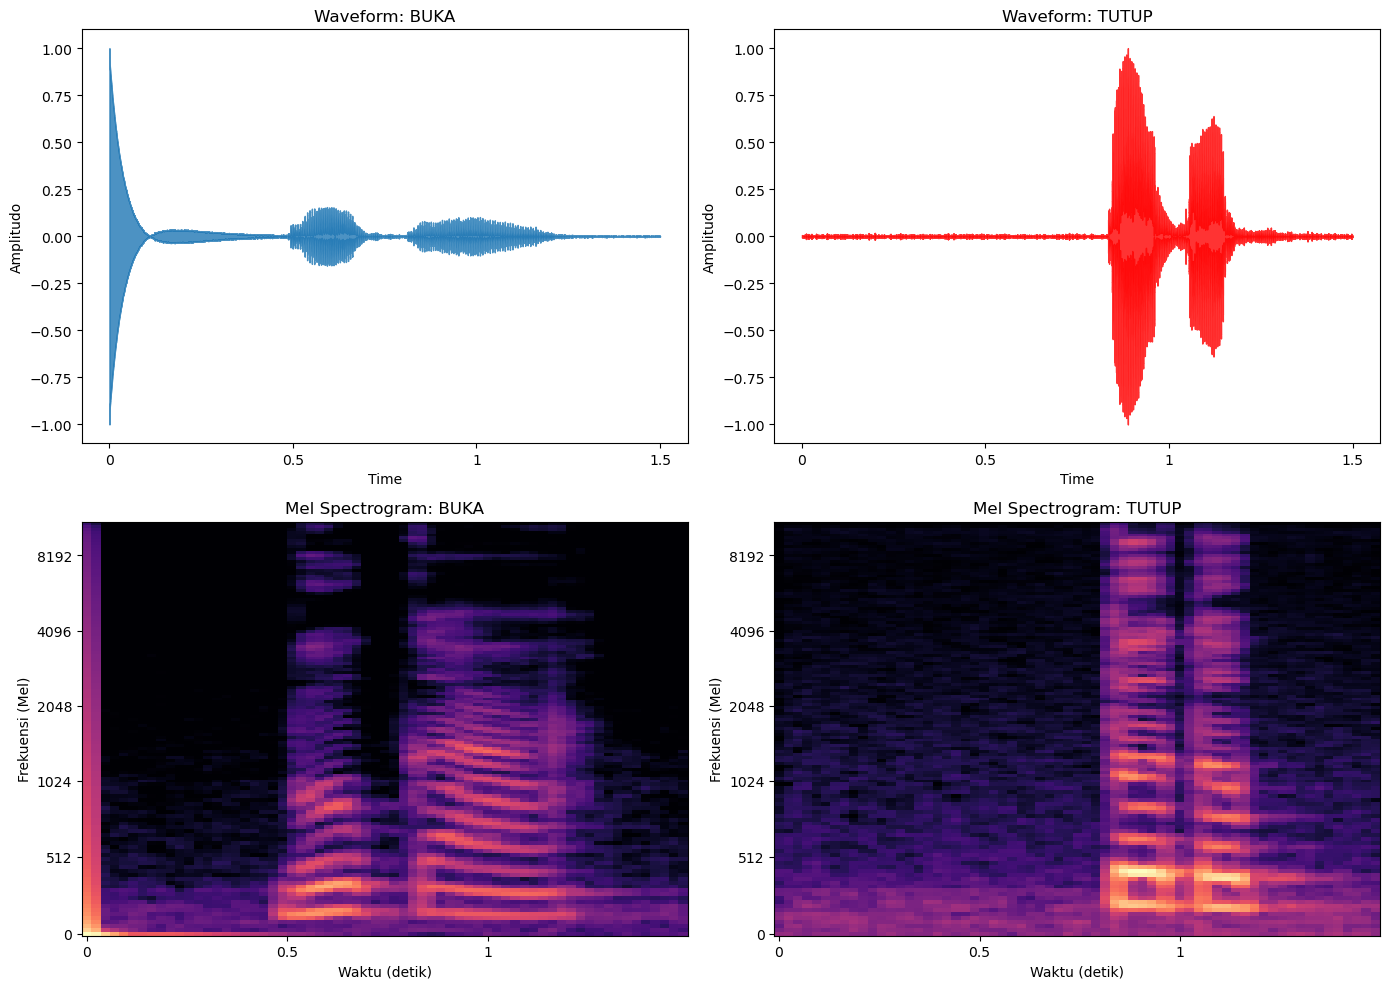

In [2]:
import matplotlib.pyplot as plt
import librosa.display

# --- Mari kita visualisasikan 1 sampel "BUKA" dan 1 sampel "TUTUP" ---

# Tentukan path ke data Anda
PATH_DATA = "./dataset/data-hasil/"
SAMPLE_RATE = 22050

# Ambil 1 contoh file
file_buka = os.path.join(PATH_DATA, "buka", "buka_001.wav")
file_tutup = os.path.join(PATH_DATA, "tutup", "tutup_001.wav")

# Muat file audio
y_buka, sr_buka = librosa.load(file_buka, sr=SAMPLE_RATE)
y_tutup, sr_tutup = librosa.load(file_tutup, sr=SAMPLE_RATE)

# --- Plotting ---
plt.figure(figsize=(14, 10))

# 1. Plot Waveform BUKA
plt.subplot(2, 2, 1)
librosa.display.waveshow(y_buka, sr=sr_buka, alpha=0.8)
plt.title('Waveform: BUKA')
plt.ylabel('Amplitudo')

# 2. Plot Waveform TUTUP
plt.subplot(2, 2, 2)
librosa.display.waveshow(y_tutup, sr=sr_tutup, color='r', alpha=0.8)
plt.title('Waveform: TUTUP')
plt.ylabel('Amplitudo')

# 3. Plot Mel Spectrogram BUKA
# Spectrogram lebih baik dalam menunjukkan 'karakter' suara
S_buka = librosa.feature.melspectrogram(y=y_buka, sr=sr_buka, n_mels=128)
S_db_buka = librosa.power_to_db(S_buka, ref=np.max)
plt.subplot(2, 2, 3)
librosa.display.specshow(S_db_buka, sr=sr_buka, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram: BUKA')
plt.ylabel('Frekuensi (Mel)')
plt.xlabel('Waktu (detik)')

# 4. Plot Mel Spectrogram TUTUP
S_tutup = librosa.feature.melspectrogram(y=y_tutup, sr=sr_tutup, n_mels=128)
S_db_tutup = librosa.power_to_db(S_tutup, ref=np.max)
plt.subplot(2, 2, 4)
librosa.display.specshow(S_db_tutup, sr=sr_tutup, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram: TUTUP')
plt.ylabel('Frekuensi (Mel)')
plt.xlabel('Waktu (detik)')

plt.tight_layout()
plt.show()

### Ekstraksi Fitur (Versi 20 MFCC)
Cell kode ini adalah skrip alternatif yang lebih lengkap untuk melakukan ekstraksi fitur. Berbeda dengan di notebook (yang menggunakan 13 MFCC), skrip ini dikonfigurasi untuk mengekstrak 20 MFCC (N_MFCC = 20) untuk analisis yang berpotensi lebih detail.  

In [ ]:
import librosa
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

# Tentukan path ke folder data Anda
PATH_DATA = "./dataset/data-hasil/"
LABELS = ["buka", "tutup"]
SAMPLE_RATE = 22050

# --- PENYESUAIAN ---
# Mengubah jumlah MFCC dari 13 menjadi 20
N_MFCC = 20 
# -------------------

# Siapkan list untuk menampung data
data_fitur = []
data_label = []

print(f"Memulai ekstraksi fitur MFCC (n_mfcc={N_MFCC})...")

# Looping untuk setiap label (buka, tutup)
for label in LABELS:
    folder_path = os.path.join(PATH_DATA, label)
    
    # Dapatkan semua nama file di dalam folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
    
    # Gunakan tqdm untuk melihat progress bar
    for file_name in tqdm(files, desc=f"Processing {label}"):
        try:
            file_path = os.path.join(folder_path, file_name)
            
            # 1. Muat file audio
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            
            # 2. Ekstrak fitur MFCC (dengan n_mfcc=20)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
            
            # 3. Ambil rata-rata MFCC di semua frame
            mfccs_rata_rata = np.mean(mfccs.T, axis=0)
            
            # 4. Simpan fitur dan label
            data_fitur.append(mfccs_rata_rata)
            data_label.append(label)
            
        except Exception as e:
            print(f"Error memproses file {file_path}: {e}")

print("\nEkstraksi fitur selesai.")

# --- Konversi ke DataFrame Pandas ---

# Buat DataFrame dari list fitur
df = pd.DataFrame(data_fitur)

# Beri nama kolom (mfcc_0, mfcc_1, ..., mfcc_19)
df = df.add_prefix('mfcc_')

# Tambahkan kolom label
df['label'] = data_label

# --- Simpan ke CSV ---
NAMA_FILE_CSV = "./dataset/data-hasil/fitur_audio_20mfcc.csv"
df.to_csv(NAMA_FILE_CSV, index=False)

print(f"Data fitur berhasil disimpan ke {NAMA_FILE_CSV}")
print("\nContoh 5 data pertama:")
print(df.head())

Memulai ekstraksi fitur MFCC (n_mfcc=20)...


Processing tutup: 100%|██████████| 100/100 [00:03<00:00, 28.25it/s]



Ekstraksi fitur selesai.
Data fitur berhasil disimpan ke ./dataset/data-hasil/fitur_audio_20mfcc.csv

Contoh 5 data pertama:
       mfcc_0     mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0 -391.825195  86.733055  21.756060  13.757183   9.030744  12.091555   
1 -219.554581  95.143524  23.050543  11.273750  12.111441   7.253877   
2 -231.499649  95.491196  21.786690  16.874832   9.731382  10.766232   
3 -239.903519  93.402954  20.391285  14.796158   7.593359   8.971307   
4 -239.522278  96.243011  13.798207  11.316676   9.502037   7.641552   

      mfcc_6    mfcc_7    mfcc_8    mfcc_9  ...   mfcc_11   mfcc_12   mfcc_13  \
0  12.048173  0.365709  1.737657  5.475190  ... -6.118983 -5.571948 -4.757148   
1  12.820862 -2.045698 -0.279506  7.276806  ... -7.047171 -9.191520 -6.422854   
2  14.763392  2.315336  0.482845  3.260504  ... -1.712604 -7.362328 -1.683394   
3  12.700639 -0.081058  0.001442  4.289254  ... -2.979377 -8.099751 -2.410700   
4  16.703917  0.591387 -1.314283  5.

### Pelatihan, Evaluasi, dan Penyimpanan Model (SVC)
Cell kode ini adalah alur kerja machine learning lengkap. Tujuannya adalah untuk melatih model klasifikasi, menguji performanya, dan menyimpannya ke disk agar dapat digunakan nanti.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [6]:
# --- 1. Muat Data ---
NAMA_FILE_CSV = "./dataset/data-hasil/fitur_audio_20mfcc.csv"
df = pd.read_csv(NAMA_FILE_CSV)

print("Data berhasil dimuat:")
print(df.head())

Data berhasil dimuat:
      mfcc_0     mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0 -391.82520  86.733055  21.756060  13.757183   9.030744  12.091555   
1 -219.55458  95.143524  23.050543  11.273750  12.111441   7.253877   
2 -231.49965  95.491196  21.786690  16.874832   9.731382  10.766232   
3 -239.90352  93.402954  20.391285  14.796158   7.593359   8.971307   
4 -239.52228  96.243010  13.798207  11.316676   9.502037   7.641552   

      mfcc_6    mfcc_7    mfcc_8    mfcc_9  ...   mfcc_11   mfcc_12   mfcc_13  \
0  12.048173  0.365709  1.737657  5.475190  ... -6.118983 -5.571948 -4.757148   
1  12.820862 -2.045698 -0.279506  7.276806  ... -7.047171 -9.191520 -6.422854   
2  14.763392  2.315336  0.482845  3.260504  ... -1.712604 -7.362328 -1.683394   
3  12.700639 -0.081058  0.001442  4.289254  ... -2.979377 -8.099751 -2.410700   
4  16.703917  0.591387 -1.314283  5.297466  ... -1.369699 -7.202394 -7.726523   

    mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19  l

In [7]:
# --- 2. Pra-pemrosesan Data ---

# Pisahkan fitur (X) dan label (y)
X = df.drop('label', axis=1) # Ambil semua kolom kecuali 'label'
y = df['label']

# Ubah label "buka" dan "tutup" menjadi angka (misal: 0 dan 1)
# Ini WAJIB karena model hanya mengerti angka
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Mari kita lihat kelasnya (0 itu apa, 1 itu apa)
print(f"\nKelas label: {encoder.classes_}")
# Ini akan mencetak sesuatu seperti: ['buka' 'tutup']
# Artinya: 'buka' = 0, 'tutup' = 1


Kelas label: ['buka' 'tutup']


In [8]:
# --- 3. Bagi Data (Train & Test Split) ---
# Kita akan gunakan 80% data untuk melatih model, 20% untuk menguji
# stratify=y_encoded: Memastikan proporsi 'buka' dan 'tutup' seimbang di data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y_encoded)

print(f"\nBentuk data latih (X_train): {X_train.shape}")
print(f"Bentuk data tes (X_test):   {X_test.shape}")


Bentuk data latih (X_train): (160, 20)
Bentuk data tes (X_test):   (40, 20)


In [9]:
# --- 4. Buat dan Latih Model ---
print("\nMemulai pelatihan model SVC...")

# Kita gunakan SVC (Support Vector Classifier)
# kernel='linear' biasanya bekerja baik untuk data teks/audio
model = SVC(kernel='linear')

# Latih model menggunakan data latih
model.fit(X_train, y_train)

print("Pelatihan model selesai.")


Memulai pelatihan model SVC...
Pelatihan model selesai.


In [12]:
# --- 5. Evaluasi Model ---
print("\n--- Hasil Evaluasi Model ---")
# Gunakan model yang sudah dilatih untuk menebak data tes
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Tampilkan laporan detail (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Tampilkan Confusion Matrix
# Ini menunjukkan berapa banyak 'buka' yang ditebak benar 'buka',
# berapa 'buka' yang salah tebak jadi 'tutup', dst.
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


--- Hasil Evaluasi Model ---
Akurasi Model: 97.50%

Classification Report:
              precision    recall  f1-score   support

        buka       1.00      0.95      0.97        20
       tutup       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40


Confusion Matrix:
[[19  1]
 [ 0 20]]


In [14]:
# --- 6. Simpan Model ---
# Ini adalah langkah KRUSIAL untuk implementasi Streamlit
NAMA_FILE_MODEL = './dataset/data-hasil/model_audio.pkl'
NAMA_FILE_ENCODER = './dataset/data-hasil/label_encoder.pkl'

joblib.dump(model, NAMA_FILE_MODEL)
joblib.dump(encoder, NAMA_FILE_ENCODER) # Kita juga simpan encoder-nya!

print(f"\nModel berhasil disimpan ke: {NAMA_FILE_MODEL}")
print(f"Encoder berhasil disimpan ke: {NAMA_FILE_ENCODER}")


Model berhasil disimpan ke: ./dataset/data-hasil/model_audio.pkl
Encoder berhasil disimpan ke: ./dataset/data-hasil/label_encoder.pkl


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Kita sudah punya data X_train, X_test, y_train, y_test dari sel sebelumnya

# --- 1. Siapkan Model Pembanding ---
models = {
    "Support Vector Machine (SVC)": SVC(kernel='linear'), # Model Anda saat ini
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5)
}

print("--- Membandingkan Performa Model ---")

# --- 2. Latih dan Evaluasi Setiap Model ---
for name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)
    
    # Prediksi data tes
    y_pred_compare = model.predict(X_test)
    
    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred_compare)
    
    print(f"\nAkurasi untuk {name}: {accuracy * 100:.2f}%")
    
    # (Opsional) Tampilkan laporan singkat
    if name != "Support Vector Machine (SVC)": # Kita sudah punya laporan detail SVC
        print(classification_report(y_test, y_pred_compare, target_names=encoder.classes_))

--- Membandingkan Performa Model ---

Akurasi untuk Support Vector Machine (SVC): 97.50%

Akurasi untuk Random Forest: 97.50%
              precision    recall  f1-score   support

        buka       0.95      1.00      0.98        20
       tutup       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



d:\Miniforge3\envs\tugaspsd\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)



Akurasi untuk K-Nearest Neighbors (KNN): 97.50%
              precision    recall  f1-score   support

        buka       1.00      0.95      0.97        20
       tutup       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

